# Walmart Recruiting - Store Sales Forecasting

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rcParams
import seaborn as sns
import os

## 1. DATA 분석

In [2]:
# 데이터 크기 확인
DATA_PATH = './data/'

DATA_IN_PATH = '.\\data\\'
print("파일 크기 : ")
for file in os.listdir(DATA_IN_PATH):
    if 'csv' in file and 'zip' not in file:
        print(file.ljust(30) + str(round(os.path.getsize(DATA_IN_PATH + file) / 1000000, 2)) + 'MB')

파일 크기 : 
features.csv                  0.59MB
sampleSubmission.csv          2.15MB
stores.csv                    0.0MB
test.csv                      2.6MB
train.csv                     12.84MB


In [3]:
# 데이터 불러오기
features_data = pd.read_csv(DATA_PATH + 'features.csv')
stores_data = pd.read_csv(DATA_PATH + 'stores.csv')
train_data = pd.read_csv(DATA_PATH + 'train.csv')
test_data = pd.read_csv(DATA_PATH + 'test.csv')
ALL_DATA = [features_data, stores_data, train_data, test_data]

In [55]:
data_name = "features_data stores_data train_data test_data".split()

In [58]:
# 데이터의 간단한 정보 확인
def data_info(data):
    print('-------------------데이터 정보-------------------')
    print(data.info())
    print('-------------------결측치 확인-------------------')
    print(data.isnull().sum())

In [59]:
for i, D in enumerate(ALL_DATA):
    print("===================",data_name[i],"===================")
    data_info(D)

=================== features_data ===================
-------------------데이터 정보-------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8190 entries, 0 to 8189
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         8190 non-null   int64  
 1   Date          8190 non-null   object 
 2   Temperature   8190 non-null   float64
 3   Fuel_Price    8190 non-null   float64
 4   MarkDown1     4032 non-null   float64
 5   MarkDown2     2921 non-null   float64
 6   MarkDown3     3613 non-null   float64
 7   MarkDown4     3464 non-null   float64
 8   MarkDown5     4050 non-null   float64
 9   CPI           7605 non-null   float64
 10  Unemployment  7605 non-null   float64
 11  IsHoliday     8190 non-null   bool   
dtypes: bool(1), float64(9), int64(1), object(1)
memory usage: 712.0+ KB
None
-------------------결측치 확인-------------------
Store              0
Date               0
Temperature        0
Fuel_P

- 입력 데이터 Columns
    - Store : 상점 번호(1~45)
    - Dept : 부서
    - Date : 날짜
    - IsHoliday : 특별한 날인지
    - Temperature : 온도
    - Fuel_Price : 유가
- 결과 데이터 Columns
    - Weekly Sales : 지정된 상점에서 지정된 부서의 판매

In [6]:
# features 데이터와 train 데이터의 개수가 맞는지 확인 (두데이터를 병합하기위해) 
if len(features_data[features_data.Store == 2]) == (len(train_data[(train_data.Store == 2) & (train_data.Dept == 3)]) + len(test_data[(test_data.Store == 2) & (test_data.Dept == 3)])):
    print(True)

True


In [7]:
# feature.csv와 train.csv 병합
train_detail = train_data.merge(features_data, 
                           how='inner',
                           on=['Store','Date','IsHoliday']).sort_values(by=['Store',
                                                                            'Dept',
                                                                            'Date']).reset_index(drop=True)


In [60]:
train_detail

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment
0,1,1,2010-02-05,24924.50,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106
1,1,1,2010-02-12,46039.49,True,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106
2,1,1,2010-02-19,41595.55,False,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106
3,1,1,2010-02-26,19403.54,False,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106
4,1,1,2010-03-05,21827.90,False,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
421565,45,98,2012-09-28,508.37,False,64.88,3.997,4556.61,20.64,1.50,1601.01,3288.25,192.013558,8.684
421566,45,98,2012-10-05,628.10,False,64.89,3.985,5046.74,NaN,18.82,2253.43,2340.01,192.170412,8.667
421567,45,98,2012-10-12,1061.02,False,54.47,4.000,1956.28,NaN,7.89,599.32,3990.54,192.327265,8.667
421568,45,98,2012-10-19,760.01,False,56.47,3.969,2004.02,NaN,3.18,437.73,1537.49,192.330854,8.667


### Holiday별 매출 비교

Text(0.5, 0, 'IsHoliday')

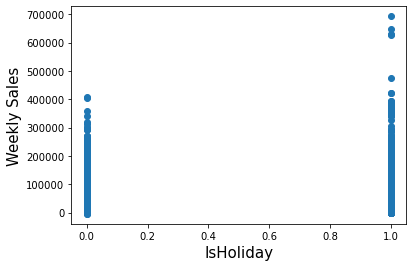

In [8]:
import seaborn as sns
plt.figure()
plt.scatter(train_detail['IsHoliday'], train_detail['Weekly_Sales'])
plt.ylabel('Weekly Sales', fontsize=15)
plt.xlabel('IsHoliday', fontsize=15)

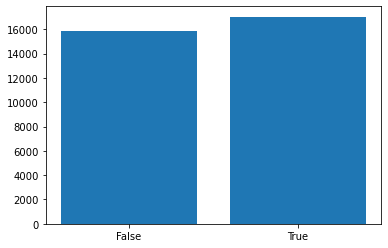

In [9]:
# Holiday별 매출 평균 비교
holiday = train_detail['Weekly_Sales'].groupby(train_detail['IsHoliday']).mean()

x = np.arange(2)
values = [holiday[False], holiday[True]]
years = holiday.index

plt.bar(x, values)
plt.xticks(x, years)
plt.show()

### 부서별 매출 비교

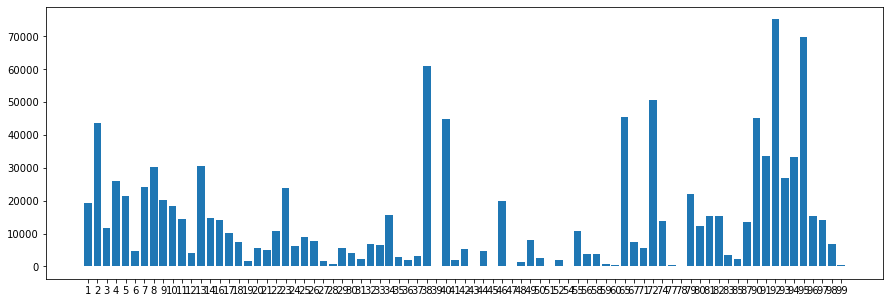

In [10]:
dept = train_detail['Weekly_Sales'].groupby(train_data['Dept']).mean()

x = np.arange(len(dept))
values = dept.values
deptNum = dept.index

plt.figure(figsize=(15, 5))
plt.bar(x, values)
plt.xticks(x, deptNum)
plt.show()

### 지점별 매출 비교

C:\Users\saeji\anaconda3\envs\py3.8_tf2.0\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


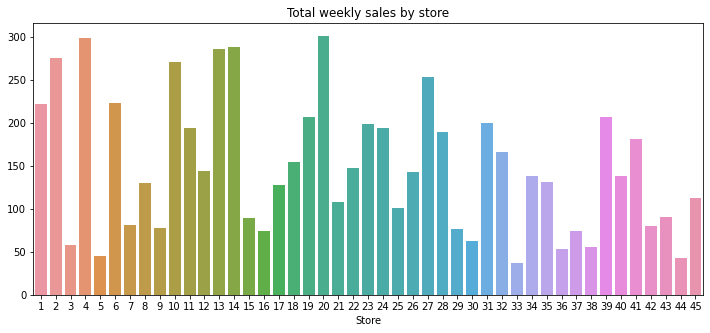

In [11]:
weekly_sales = train_detail['Weekly_Sales'].groupby(train_detail['Store']).sum()
weekly_sales_easy = round(weekly_sales/ 1000000, 2)

plt.figure(figsize=(12, 5))
plt.title('Total weekly sales by store')

sns.barplot(weekly_sales_easy.index, weekly_sales_easy.values)
plt.show()

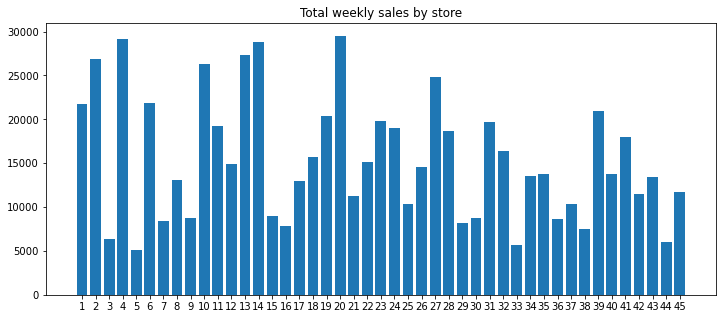

In [12]:
store = train_data['Weekly_Sales'].groupby(train_data['Store']).mean()

x = np.arange(len(store))
values = store.values
storeNum = store.index

plt.figure(figsize=(12, 5))
plt.title('Total weekly sales by store')

plt.bar(x, values)
plt.xticks(x, storeNum)
plt.show()

### 날짜별 매출

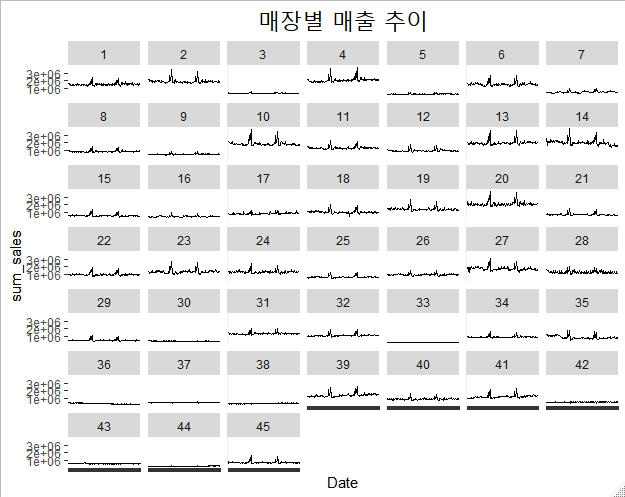

In [13]:
from IPython.display import Image  # 주피터 노트북에 이미지 삽입
Image("img/매장별_날짜_매출.png")

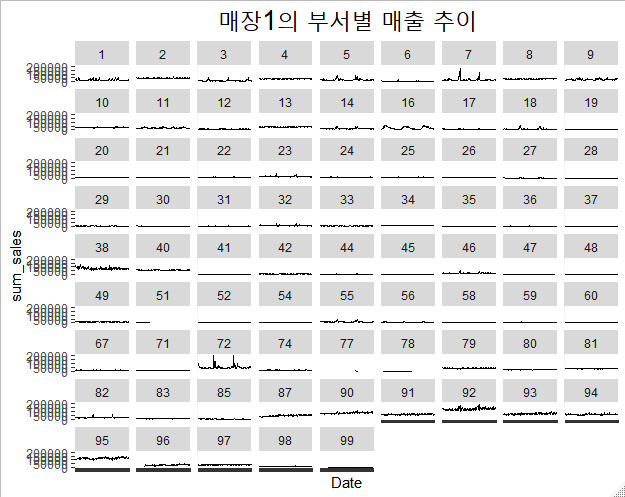

In [14]:
Image("img/매장1의_부서별_매출_.png")

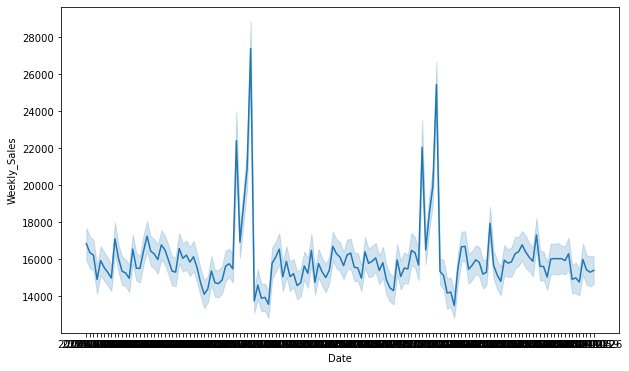

In [15]:
rcParams['figure.figsize'] = 10,6.0
sns.lineplot(x = train_detail.Date, y = "Weekly_Sales", data = train_detail);

### 온도별 매출 비교

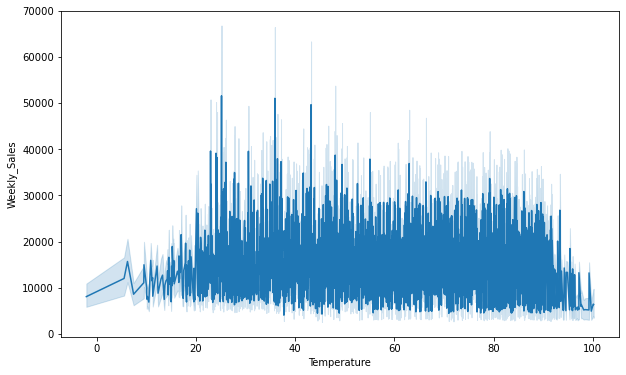

In [16]:
rcParams['figure.figsize'] = 10,6.0
sns.lineplot(x = "Temperature", y = "Weekly_Sales", data = train_detail);

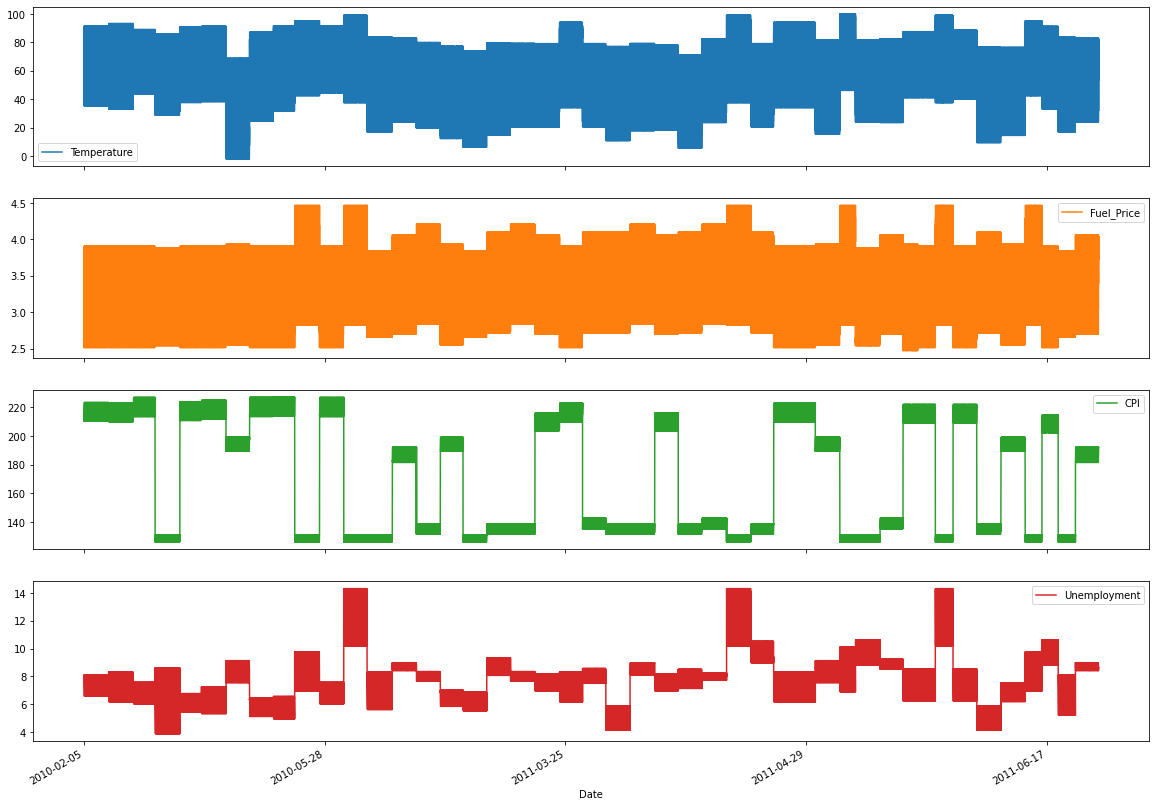

In [17]:
train_detail[['Date', 'Temperature', 'Fuel_Price', 'CPI', 'Unemployment']].plot(x='Date', subplots=True, figsize=(20,15));

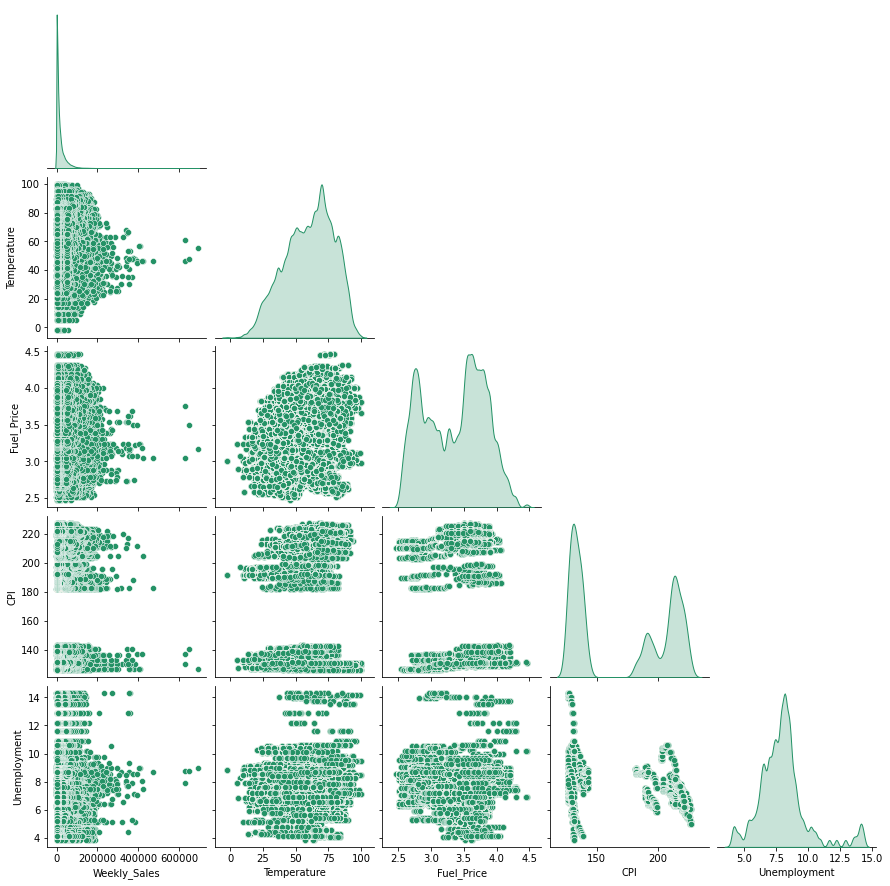

In [18]:
sns.set_palette("summer")
sns.pairplot(train_detail[['Weekly_Sales', 'Temperature', 'Fuel_Price', 'CPI', 'Unemployment']],
            corner=True, diag_kind='kde');

### 유가별 매출 비교

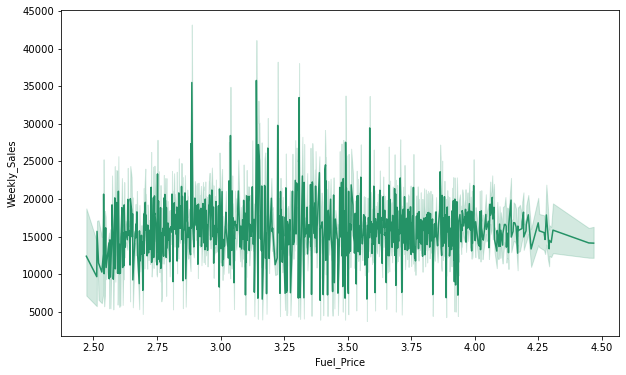

In [20]:
rcParams['figure.figsize'] = 10,6.0
sns.lineplot(x = "Fuel_Price", y = "Weekly_Sales", data = train_detail);

## 2. 데이터 전처리

In [21]:
train_data

,Store,Dept,Date,Weekly_Sales,IsHoliday
0,1,1,2010-02-05,24924.50,False
1,1,1,2010-02-12,46039.49,True
2,1,1,2010-02-19,41595.55,False
3,1,1,2010-02-26,19403.54,False
4,1,1,2010-03-05,21827.90,False
...,...,...,...,...,...
421565,45,98,2012-09-28,508.37,False
421566,45,98,2012-10-05,628.10,False
421567,45,98,2012-10-12,1061.02,False
421568,45,98,2012-10-19,760.01,False


In [22]:
# 주간 판매량 예측이므로, 주간 정보 생성
input_data = train_data.copy()
input_data['Date'] = pd.to_datetime(input_data['Date'], errors='coerce')
input_data['Week'] = input_data.Date.dt.week 
del input_data['Date']
input_data

<ipython-input-22-a458103b5fc2>:4: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  input_data['Week'] = input_data.Date.dt.week


,Store,Dept,Weekly_Sales,IsHoliday,Week
0,1,1,24924.50,False,5
1,1,1,46039.49,True,6
2,1,1,41595.55,False,7
3,1,1,19403.54,False,8
4,1,1,21827.90,False,9
...,...,...,...,...,...
421565,45,98,508.37,False,39
421566,45,98,628.10,False,40
421567,45,98,1061.02,False,41
421568,45,98,760.01,False,42


In [23]:
def preprocessing(data):
    input_data = data.copy()
    input_data['Date'] = pd.to_datetime(input_data['Date'], errors='coerce')
    input_data['Week'] = input_data.Date.dt.week 
    del input_data['Date']
    
    return input_data

In [24]:
input_data = preprocessing(train_data)

<ipython-input-23-0d52e7801ab0>:4: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  input_data['Week'] = input_data.Date.dt.week


In [25]:
X = input_data[['Store', 'Dept', 'IsHoliday', 'Week']]
y = input_data['Weekly_Sales']
X

,Store,Dept,IsHoliday,Week
0,1,1,False,5
1,1,1,True,6
2,1,1,False,7
3,1,1,False,8
4,1,1,False,9
...,...,...,...,...
421565,45,98,False,39
421566,45,98,False,40
421567,45,98,False,41
421568,45,98,False,42


In [26]:
max(X.Week)

52

In [27]:
y

0         24924.50
1         46039.49
2         41595.55
3         19403.54
4         21827.90
            ...   
421565      508.37
421566      628.10
421567     1061.02
421568      760.01
421569     1076.80
Name: Weekly_Sales, Length: 421570, dtype: float64

## 3. 모델 선택 및 학습

In [28]:
# 필요한 모듈 불러오기
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
RANDOM_SEED = 42
TEST_SPLIT = 0.2

In [29]:
# train과 test 데이터로 나누기
# X = train_total[['Store','Dept','IsHoliday','Size','Week','Type']]
# y = train_total['Weekly_Sales']
x_train, x_test, y_train, y_test = train_test_split(X, y,test_size=TEST_SPLIT,random_state = RANDOM_SEED)

In [30]:
model = []

# LinearRegression 모델 
model.append(('LinearRegression', LinearRegression()))
# DecisionTreeRegressor 모델
model.append(('DecisionTreeRegressor', DecisionTreeRegressor()))
# RandomForestRegressor
model.append(('RandomForestRegressor', RandomForestRegressor(n_estimators=50,max_depth = 25,
                                                             min_samples_leaf = 1, min_samples_split = 6)))

In [31]:
result = {}

for name, m in model:
    m.fit(x_train, y_train)
    result[name] = (m.score(x_train, y_train), m.score(x_test, y_test))
    print("{}\ttrain_score : {} \ttest_score: {}".format(name, result[name][0], result[name][1]))

LinearRegression	train_score : 0.030646903897343147 	test_score: 0.030612111903640216
DecisionTreeRegressor	train_score : 0.9896491491279584 	test_score: 0.9581971209453726
RandomForestRegressor	train_score : 0.9818967579156177 	test_score: 0.9628440396518558


In [32]:
result

{'LinearRegression': (0.030646903897343147, 0.030612111903640216),
 'DecisionTreeRegressor': (0.9896491491279584, 0.9581971209453726),
 'RandomForestRegressor': (0.9818967579156177, 0.9628440396518558)}

In [33]:
idx = pd.Index(["Train Accuracy", "Test Accuracy"])
result_df = pd.DataFrame(result, index=idx)
result_df

,LinearRegression,DecisionTreeRegressor,RandomForestRegressor
Train Accuracy,0.030647,0.989649,0.981897
Test Accuracy,0.030612,0.958197,0.962844


## 4. 모델 최적화(Hyper Parameter )

In [44]:
from sklearn.model_selection import GridSearchCV

params ={
    'n_estimators':[50, 100],
    'max_depth':[8,16,32,64],
    'min_samples_leaf':[1,2,3],
    'min_samples_split':[3,4,5,6]
}

rf_optimize = RandomForestRegressor(random_state=0, n_jobs=-1)
grid_cv = GridSearchCV(rf_optimize, param_grid=params, cv=2, n_jobs=-1)
grid_cv.fit(x_train, y_train)

GridSearchCV(cv=2, estimator=RandomForestRegressor(n_jobs=-1, random_state=0),
             n_jobs=-1,
             param_grid={'max_depth': [8, 16, 32, 64],
                         'min_samples_leaf': [1, 2, 3],
                         'min_samples_split': [3, 4, 5, 6],
                         'n_estimators': [50, 100]})

In [45]:
grid_cv.best_params_

{'max_depth': 64,
 'min_samples_leaf': 1,
 'min_samples_split': 3,
 'n_estimators': 100}

In [47]:
optimized_RF = RandomForestRegressor(n_estimators=100, max_depth = 64, min_samples_leaf = 1, min_samples_split = 3)
optimized_RF.fit(x_train, y_train)
result['optimized_RF'] = (optimized_RF.score(x_train, y_train), optimized_RF.score(x_test, y_test))
print("{}\ttrain_score : {} \ttest_score: {}".format(name, result[name][0], result[name][1]))

RandomForestRegressor	train_score : 0.9818967579156177 	test_score: 0.9628440396518558


In [49]:
# model 집합에 추가
model.append(('optimized_RF', optimized_RF))

In [50]:
idx = pd.Index(["Train Accuracy", "Test Accuracy"])
result_df = pd.DataFrame(result, index=idx)
result_df

,LinearRegression,DecisionTreeRegressor,RandomForestRegressor,optimized_RF
Train Accuracy,0.030647,0.989649,0.981897,0.987080
Test Accuracy,0.030612,0.958197,0.962844,0.962858


## 5. 추론 및 결과

In [51]:
test_input = preprocessing(test_data)
test_predict = model[2][1].predict(test_input)
test_predict

<ipython-input-23-0d52e7801ab0>:4: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  input_data['Week'] = input_data.Date.dt.week


array([36661.70178274, 19262.49404524, 19322.25153   , ...,
         849.0247469 ,   511.21380595,   600.9795419 ])

In [52]:
inferenced_test = test_input.copy()
inferenced_test['Weekly_Sales'] = test_predict
inferenced_test

,Store,Dept,IsHoliday,Week,Weekly_Sales
0,1,1,False,44,36661.701783
1,1,1,False,45,19262.494045
2,1,1,False,46,19322.251530
3,1,1,True,47,20170.659420
4,1,1,False,48,24737.490267
...,...,...,...,...,...
115059,45,98,False,26,820.023674
115060,45,98,False,27,830.374220
115061,45,98,False,28,849.024747
115062,45,98,False,29,511.213806


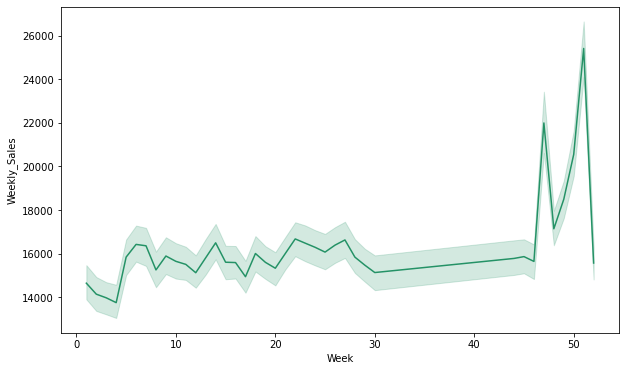

In [53]:
rcParams['figure.figsize'] = 10,6.0
sns.lineplot(x = inferenced_test.Week, y = "Weekly_Sales", data = inferenced_test);

In [61]:
submission = pd.read_csv(DATA_PATH + 'sampleSubmission.csv')
submission['Weekly_Sales'] = test_predict
submission

,Id,Weekly_Sales
0,1_1_2012-11-02,36661.701783
1,1_1_2012-11-09,19262.494045
2,1_1_2012-11-16,19322.251530
3,1_1_2012-11-23,20170.659420
4,1_1_2012-11-30,24737.490267
...,...,...
115059,45_98_2013-06-28,820.023674
115060,45_98_2013-07-05,830.374220
115061,45_98_2013-07-12,849.024747
115062,45_98_2013-07-19,511.213806


In [62]:
submission.to_csv("submission.csv", index=False)

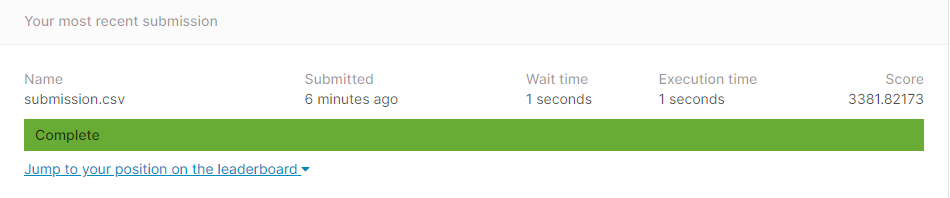

In [65]:
Image('img/캐글 점수.PNG')

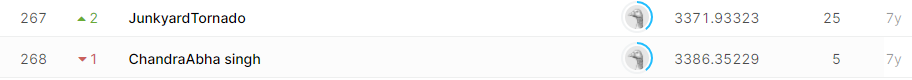

In [67]:
Image('img/추정 랭킹.PNG')